In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta

In [29]:
def Plotbox(mdtf1,mcolum,morder):
    plt.rcParams['figure.dpi'] = 140
    sns.boxplot(x='test', y=mcolum, data=mdtf1, order=morder)
    ax = plt.gca()
    ax.grid(True)
    plt.show()
    
def Append(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5,mdtf6,mdtf7):
    mdtf1 = mdtf1.append(mdtf2)
    mdtf1 = mdtf1.append(mdtf3)
    mdtf1 = mdtf1.append(mdtf4)
    mdtf1 = mdtf1.append(mdtf5)
    mdtf1 = mdtf1.append(mdtf6)
    return mdtf1.append(mdtf7)

def Append10(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5,mdtf6,mdtf7,mdtf8,mdtf9,mdtf10):
    mdtf1 = mdtf1.append(mdtf2)
    mdtf1 = mdtf1.append(mdtf3)
    mdtf1 = mdtf1.append(mdtf4)
    mdtf1 = mdtf1.append(mdtf5)
    mdtf1 = mdtf1.append(mdtf6)
    mdtf1 = mdtf1.append(mdtf7)
    mdtf1 = mdtf1.append(mdtf8)
    mdtf1 = mdtf1.append(mdtf9)
    return mdtf1.append(mdtf10)
    
def AppendAndPlot(df1,df2,df3,df4,df5,df6,df7,
                  O_column, simbol, value, morder):
    ndf = Append(df1, df2, df3, df4, df5, df6, df7).reset_index(drop=True)
    ndf[O_column] = CastOutLayers(ndf, O_column, simbol,value)
    Plotbox(ndf,O_column,morder)
    
def CastAndPlot (ndf, O_column, simbol, value, morder):
    ndf[O_column] = CastOutLayers(ndf, O_column, simbol,value)
    Plotbox(ndf,O_column,morder)

def CastOutLayers(mdtf1, column, lowerorgreater,mlimit):
    aux = []
    for row in mdtf1[column]:
        if type(row) is str:
            row =row.replace(".", "")
        if lowerorgreater == "<":
            if float(row) > mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
        elif lowerorgreater == ">":
            if float(row) < mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
    return aux

In [19]:
def get_latency(dft):
    t_llegada = pd.to_datetime(dft.llegada, format="%Y-%m-%d %H:%M:%S.%f")
    t_envio = pd.to_datetime(dft.salida,  format="%Y-%m-%d %H:%M:%S.%f")
    dft['latency in seconds'] = ((t_llegada - t_envio)/2)/ np.timedelta64(1, 's')
    return dft[['latency in seconds','test']]

def Get_CSV(nameCSV):
    return pd.read_csv(nameCSV, names = ["timestamp1", "salida","llegada"])

In [49]:
dft25 = Get_CSV('latencyRaspberry/2G_taskmanager/Wifi25.csv')
dft25  ["test"]= "25"
lat25 = get_latency(dft25)

dft50 = Get_CSV('latencyRaspberry/2G_taskmanager/Wifi50.csv')
dft50  ["test"]= "50"
lat50 = get_latency(dft50)

dft75 = Get_CSV('latencyRaspberry/2G_taskmanager/Wifi75.csv')
dft75  ["test"]= "75"
lat75 = get_latency(dft75)

dft100 = Get_CSV('latencyRaspberry/2G_taskmanager/Wifi100.csv')
dft100  ["test"]= "100"
lat100 = get_latency(dft100)

dft125 = Get_CSV('latencyRaspberry/2G_taskmanager/Wifi125.csv')
dft125  ["test"]= "125"
lat125 = get_latency(dft125)

dft150 = Get_CSV('latencyRaspberry/2G_taskmanager/Wifi150.csv')
dft150  ["test"]= "150"
lat150 = get_latency(dft150)

dft175 = Get_CSV('latencyRaspberry/2G_taskmanager/Wifi175.csv')
dft175  ["test"]= "175"
lat175 = get_latency(dft175)

dft200 = Get_CSV('latencyRaspberry/2G_taskmanager/Wifi200.csv')
dft200  ["test"]= "200"
lat200 = get_latency(dft200)

dft225 = Get_CSV('latencyRaspberry/2G_taskmanager/Wifi225.csv')
dft225  ["test"]= "225"
lat225 = get_latency(dft225)

dft250 = Get_CSV('latencyRaspberry/2G_taskmanager/Wifi250.csv')
dft250  ["test"]= "250"
lat250 = get_latency(dft250)

In [27]:
morder=["25", "50", "75", "100", "125", "150", "175","200","225","250"]

In [46]:
lat250["latency in seconds"].describe()

count    2500.000000
mean        1.288594
std         0.552147
min         0.108747
25%         0.904594
50%         1.276453
75%         1.649140
max         3.268545
Name: latency in seconds, dtype: float64

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


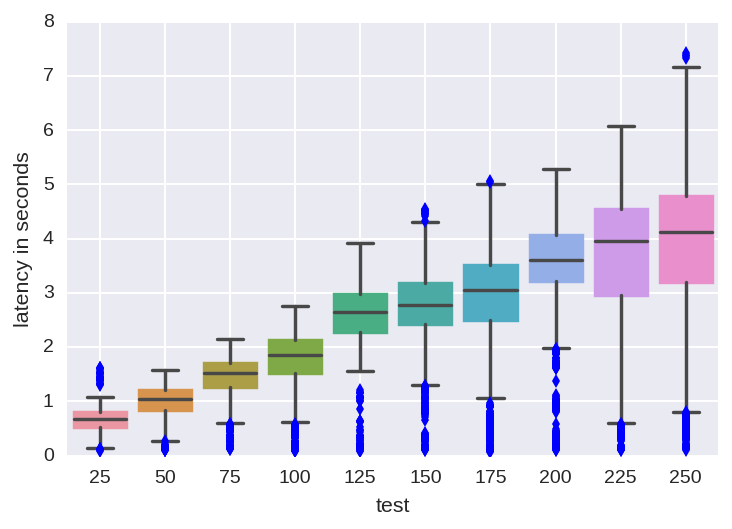

In [50]:
latT = Append10(lat25, lat50, lat75, lat100, lat125, lat150, lat175, lat200, lat225, lat250)
CastAndPlot(latT,"latency in seconds","<",9.5,morder)

In [37]:
def CastOutLayers(mdtf1, column, lowerorgreater,mlimit):
    aux = []
    for row in mdtf1[column]:
        if type(row) is str:
            row =row.replace(".", "")
        if lowerorgreater == "<":
            if float(row) > mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
        elif lowerorgreater == ">":
            if float(row) < mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
    return aux

def CastAll(df1,df2,df3,df4,df5,df6,df7,N_column,lowerorgreater,mlimit):
    df1[N_column] = CastOutLayers(df1,N_column,lowerorgreater,mlimit)
    df2[N_column] = CastOutLayers(df2,N_column,lowerorgreater,mlimit)
    df3[N_column] = CastOutLayers(df3,N_column,lowerorgreater,mlimit)
    df4[N_column] = CastOutLayers(df4,N_column,lowerorgreater,mlimit)
    df5[N_column] = CastOutLayers(df5,N_column,lowerorgreater,mlimit)
    df6[N_column] = CastOutLayers(df6,N_column,lowerorgreater,mlimit)
    df7[N_column] = CastOutLayers(df7,N_column,lowerorgreater,mlimit)
    return df1,df2,df3,df4,df5,df6,df7
    
def CastAndPlot1(df1,N_column):
    plt.rcParams['figure.dpi'] = 200
    plt.plot(df1[N_column])
    ax = plt.gca()
    ax.grid(True)
    ax.grid(color='black', linestyle='-', linewidth=0.05)
    ax.set_axis_bgcolor('white')
    plt.legend(N_column, loc='upper center')
    plt.xlabel('Nº Alarmas')
    plt.ylabel(N_column)
    plt.savefig(N_column+'_O.eps', format='eps', dpi=1000)

def CastAndPlot2(df1,df2,N_column,lowerorgreater,mlimit,morder,leyenda):
    plt.rcParams['figure.dpi'] = 200
    plt.plot(morder,df1)
    plt.plot(morder,df2)
    ax = plt.gca()
    ax.grid(True)
    ax.grid(color='black', linestyle='-', linewidth=0.05)
    ax.set_axis_bgcolor('white')
    plt.legend(leyenda, loc='upper center')
    plt.xticks(np.arange(25, 275, step=25))
    plt.xlabel('Nº Alarmas')
    plt.ylabel(N_column)
    plt.savefig(N_column+'_O.eps', format='eps', dpi=1000)

In [31]:
dft25 = Get_CSV('latencyRaspberry/4G25.csv')
dft25  ["test"]= "25"
lat25g = get_latency(dft25)

dft50 = Get_CSV('latencyRaspberry/4G50.csv')
dft50  ["test"]= "50"
lat50g = get_latency(dft50)

dft75 = Get_CSV('latencyRaspberry/4G75.csv')
dft75  ["test"]= "75"
lat75g = get_latency(dft75)

dft100 = Get_CSV('latencyRaspberry/4G100.csv')
dft100  ["test"]= "100"
lat100g = get_latency(dft100)

dft125 = Get_CSV('latencyRaspberry/4G125.csv')
dft125  ["test"]= "125"
lat125g = get_latency(dft125)

dft150 = Get_CSV('latencyRaspberry/4G150.csv')
dft150  ["test"]= "150"
lat150g = get_latency(dft150)

dft175 = Get_CSV('latencyRaspberry/4G175.csv')
dft175  ["test"]= "175"
lat175g = get_latency(dft175)

dft200 = Get_CSV('latencyRaspberry/4G200.csv')
dft200  ["test"]= "200"
lat200g = get_latency(dft200)

dft225 = Get_CSV('latencyRaspberry/4G225.csv')
dft225  ["test"]= "225"
lat225g = get_latency(dft225)

dft250 = Get_CSV('latencyRaspberry/4G250.csv')
dft250  ["test"]= "250"
lat250g = get_latency(dft250)

dft275 = Get_CSV('latencyRaspberry/4G275.csv')
dft275  ["test"]= "275"
lat275g = get_latency(dft275)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


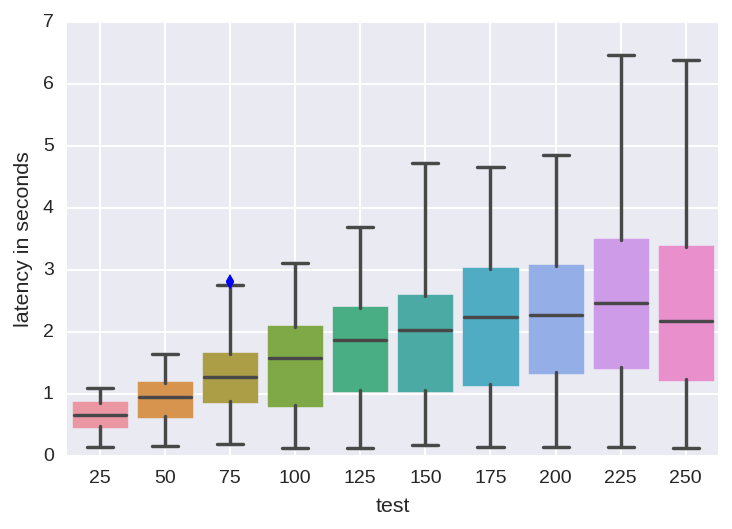

In [32]:
latT = Append10(lat25g, lat50g, lat75g, lat100g, lat125g, lat150g, lat175g, lat200g, lat225g, lat250g)
CastAndPlot(latT,"latency in seconds","<",9.5,morder)

In [33]:
def getMean(df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,N_column):
    return [df1[N_column].mean(),df2[N_column].mean(),df3[N_column].mean(),df4[N_column].mean(),df5[N_column].mean(),
            df6[N_column].mean(),df7[N_column].mean(),df8[N_column].mean(),df9[N_column].mean(),df10[N_column].mean()]

In [43]:
lrasp = getMean(lat25, lat50, lat75, lat100, lat125, lat150, lat175,
                lat200, lat225, lat250,"latency in seconds")
lodroid = getMean(lat25g, lat50g, lat75g, lat100g, lat125g, lat150g,
                  lat175g, lat200g, lat225g, lat250g, "latency in seconds")

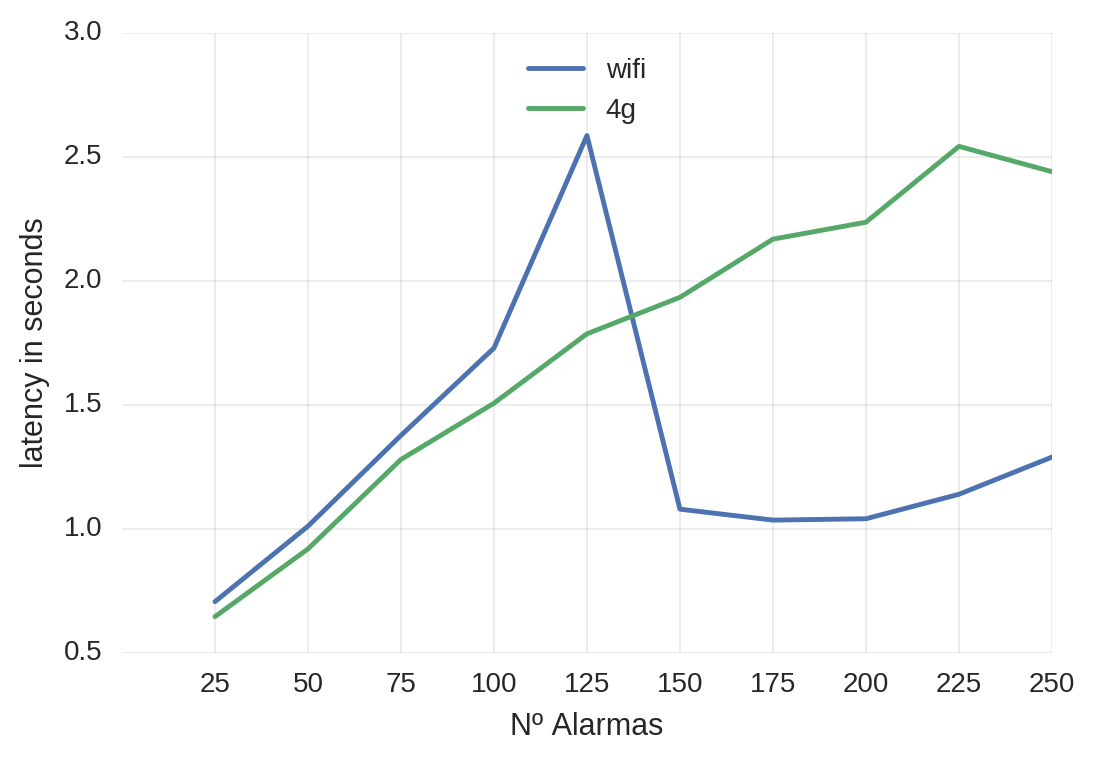

In [44]:
CastAndPlot2(lrasp,lodroid,"latency in seconds",
              "<",10,morder,["wifi","4g"])